# Greedy method of Newman: modularity maximization
Clauset-Newman-Moore greedy modularity maximization to find the community partition with the largest modularity ([networkx implementation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html#networkx.algorithms.community.modularity_max.greedy_modularity_communities)).

In [1]:
# load libraries
import networkx as nx
import numpy as np
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
plt.rcParams["figure.figsize"] = (12, 12)
nets_path = "nets"

In [2]:
# traverse all the network files
for r, s, files in os.walk(nets_path):
    for f in files:
        if f.split(".")[-1] == "net": # To avoid .clu files 
            print(f"------- Network: {r}\{f} -----")
            g = nx.read_pajek(os.path.join(r, f))
            print(f"{g.number_of_nodes()} nodes, {g.number_of_edges()} edges.")

------- Network: nets\model\256_4_4_2_15_18_p.net -----
256 nodes, 4548 edges.
------- Network: nets\model\256_4_4_4_13_18_p.net -----
256 nodes, 4598 edges.
------- Network: nets\model\rb125.net -----
125 nodes, 426 edges.
------- Network: nets\real\airports_UW.net -----
3618 nodes, 14142 edges.
------- Network: nets\real\cat_cortex_sim.net -----
55 nodes, 1128 edges.
------- Network: nets\real\dolphins.net -----
62 nodes, 159 edges.
------- Network: nets\real\football.net -----
115 nodes, 613 edges.
------- Network: nets\real\zachary_unwh.net -----
34 nodes, 78 edges.
------- Network: nets\toy\20x2+5x2.net -----
50 nodes, 404 edges.
------- Network: nets\toy\graph3+1+3.net -----
7 nodes, 8 edges.
------- Network: nets\toy\graph4+4.net -----
8 nodes, 13 edges.
------- Network: nets\toy\grid-p-6x6.net -----
36 nodes, 72 edges.
------- Network: nets\toy\star.net -----
9 nodes, 8 edges.


## Testing on a single network

In [3]:
network_f = "model"
network_name = "256_4_4_2_15_18_p"

In [4]:
G1 = nx.read_pajek(os.path.join("nets", network_f, network_name + '.net'))

In [5]:
print("Number of nodes: {}".format(G1.number_of_nodes()))
#G1.nodes()

print("Number of edges: {}".format(G1.number_of_edges()))
#G1.edges()

degrees_values = [val for key,val in G1.degree()] # degree for each node
#degrees_values

print("Min degree: {}".format(np.min(degrees_values)))
print("Max degree: {}".format(np.max(degrees_values)))
print("Avg degree: {}".format(round(np.mean(degrees_values), 4)))
#G1 = nx.Graph(G1)

#print("Clustering: {}".format(round(nx.average_clustering(G1), 4))) <----->
print("Assortativity: {}".format(round(nx.degree_assortativity_coefficient(G1), 4)))
if nx.is_connected(G1):
    print("Avg path length: {}".format(round(nx.average_shortest_path_length(G1), 4)))
    print("Diameter: {}".format(nx.diameter(G1)))

Number of nodes: 256
Number of edges: 4548
Min degree: 30
Max degree: 46
Avg degree: 35.5312
Assortativity: 0.0286
Avg path length: 2.7821
Diameter: 5


### Plot the net
Because we want to provide proper visualisation of the communities, we will use a layout algorithm offered by Kamada-Kawai (note: This algorithm is considering "springs" between each edges and compute the minimal energy the whole graph in order to render the network with minimal edge-overlapping. Original paper: https://doi.org/10.1016/0020-0190(89)90102-6) to visualise communtities.

In [6]:
# compute nodes position for plotting
pos = nx.kamada_kawai_layout(G1)

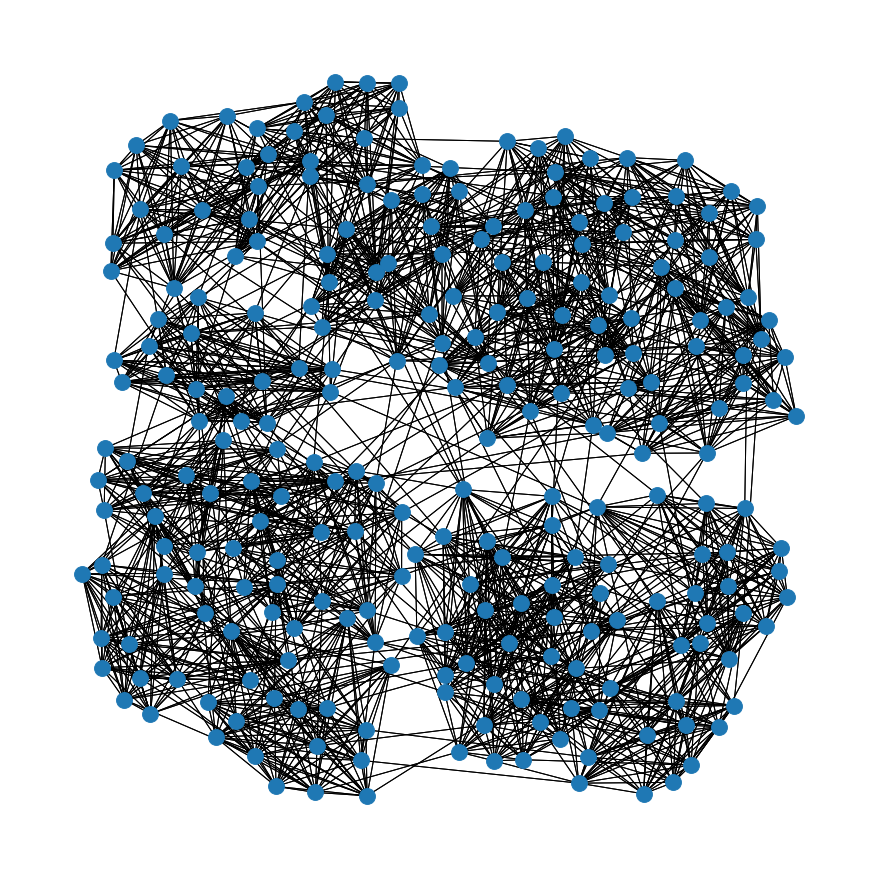

In [7]:
nx.draw(G1, pos=pos, node_size=250)
plt.savefig(os.path.join("images", network_f, network_name + '_intro-plot.png'))

With the plot of this network, we are able to identify several communities with our human vision, as we are naturally able to make complex associations between objects. However, for real-world usecases, we need to implement algorithms that can compute communities, like we are doing, based on different criteria specific to each algorithm: betweeness, maximum modularity and so on.

## Community detection
The algorithm finds communities by using a modularity maximization approach.
It begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no futher increase in modularity is possible (a maximum).

For the detailed implementation, see networkx reference ([networkx implementation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html#networkx.algorithms.community.modularity_max.greedy_modularity_communities)).

In [8]:
communities = nx_comm.greedy_modularity_communities(G1, weight='weight')
print("Number of found communities: {}".format(len(communities)))

Number of found communities: 9


In [9]:
print(communities)

[frozenset({'*58*', '*51*', '*17*', '*55*', '*5*', '*32*', '*14*', '*62*', '*64*', '*28*', '*31*', '*26*', '*2*', '*8*', '*9*', '*21*', '*25*', '*54*', '*30*', '*20*', '*60*', '*27*', '*11*', '*13*', '*4*', '*15*', '*22*', '*63*', '*57*', '*18*', '*33*', '*53*', '*19*', '*3*', '*52*', '*16*', '*24*', '*6*', '*50*', '*10*', '*65*', '*61*', '*56*', '*12*', '*7*', '*59*', '*29*', '*23*'}), frozenset({'*98*', '*119*', '*104*', '*110*', '*115*', '*109*', '*128*', '*111*', '*116*', '*122*', '*113*', '*118*', '*101*', '*125*', '*112*', '*105*', '*102*', '*106*', '*124*', '*103*', '*129*', '*107*', '*126*', '*108*', '*123*', '*120*', '*99*', '*114*', '*117*', '*76*', '*100*', '*127*', '*121*'}), frozenset({'*163*', '*136*', '*169*', '*171*', '*145*', '*143*', '*166*', '*130*', '*131*', '*164*', '*177*', '*134*', '*142*', '*141*', '*172*', '*167*', '*137*', '*138*', '*139*', '*140*', '*168*', '*162*', '*176*', '*170*', '*133*', '*173*', '*165*', '*135*', '*132*', '*174*', '*144*', '*175*'}), fr

In [10]:
# first community (the largest)
print(sorted(communities[0]))

['*10*', '*11*', '*12*', '*13*', '*14*', '*15*', '*16*', '*17*', '*18*', '*19*', '*2*', '*20*', '*21*', '*22*', '*23*', '*24*', '*25*', '*26*', '*27*', '*28*', '*29*', '*3*', '*30*', '*31*', '*32*', '*33*', '*4*', '*5*', '*50*', '*51*', '*52*', '*53*', '*54*', '*55*', '*56*', '*57*', '*58*', '*59*', '*6*', '*60*', '*61*', '*62*', '*63*', '*64*', '*65*', '*7*', '*8*', '*9*']


### Modularity
Returns the modularity of the obtained graph partition
([networkx implementation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html#networkx.algorithms.community.quality.modularity)). 

In [11]:
nx_comm.modularity(G1, communities)

0.7603253172067089

### Community visualisation


In [12]:
for node in G1.nodes():
    print(node)

*2*
*3*
*4*
*5*
*6*
*7*
*8*
*9*
*10*
*11*
*12*
*13*
*14*
*15*
*16*
*17*
*18*
*19*
*20*
*21*
*22*
*23*
*24*
*25*
*26*
*27*
*28*
*29*
*30*
*31*
*32*
*33*
*34*
*35*
*36*
*37*
*38*
*39*
*40*
*41*
*42*
*43*
*44*
*45*
*46*
*47*
*48*
*49*
*50*
*51*
*52*
*53*
*54*
*55*
*56*
*57*
*58*
*59*
*60*
*61*
*62*
*63*
*64*
*65*
*66*
*67*
*68*
*69*
*70*
*71*
*72*
*73*
*74*
*75*
*76*
*77*
*78*
*79*
*80*
*81*
*82*
*83*
*84*
*85*
*86*
*87*
*88*
*89*
*90*
*91*
*92*
*93*
*94*
*95*
*96*
*97*
*98*
*99*
*100*
*101*
*102*
*103*
*104*
*105*
*106*
*107*
*108*
*109*
*110*
*111*
*112*
*113*
*114*
*115*
*116*
*117*
*118*
*119*
*120*
*121*
*122*
*123*
*124*
*125*
*126*
*127*
*128*
*129*
*130*
*131*
*132*
*133*
*134*
*135*
*136*
*137*
*138*
*139*
*140*
*141*
*142*
*143*
*144*
*145*
*146*
*147*
*148*
*149*
*150*
*151*
*152*
*153*
*154*
*155*
*156*
*157*
*158*
*159*
*160*
*161*
*162*
*163*
*164*
*165*
*166*
*167*
*168*
*169*
*170*
*171*
*172*
*173*
*174*
*175*
*176*
*177*
*178*
*179*
*180*
*181*
*182*
*183*
*184*
*185*
*1

In [13]:
# dict assigning to each node the corresponding community number
part = {}

for node in G1.nodes():    
    for i in range(len(communities)):
        if node in sorted(communities[i]):
            part[int(node.replace('*', ""))] = i
print(part)

{2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 6, 35: 6, 36: 6, 37: 6, 38: 6, 39: 6, 40: 6, 41: 6, 42: 6, 43: 6, 44: 6, 45: 6, 46: 6, 47: 6, 48: 6, 49: 6, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 5, 67: 5, 68: 5, 69: 5, 70: 5, 71: 5, 72: 5, 73: 5, 74: 5, 75: 5, 76: 1, 77: 5, 78: 5, 79: 5, 80: 5, 81: 5, 82: 5, 83: 5, 84: 5, 85: 5, 86: 5, 87: 5, 88: 5, 89: 5, 90: 5, 91: 5, 92: 5, 93: 5, 94: 5, 95: 5, 96: 5, 97: 5, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 2, 131: 2, 132: 2, 133: 2, 134: 2, 135: 2, 136: 2, 137: 2, 138: 2, 139: 2, 1

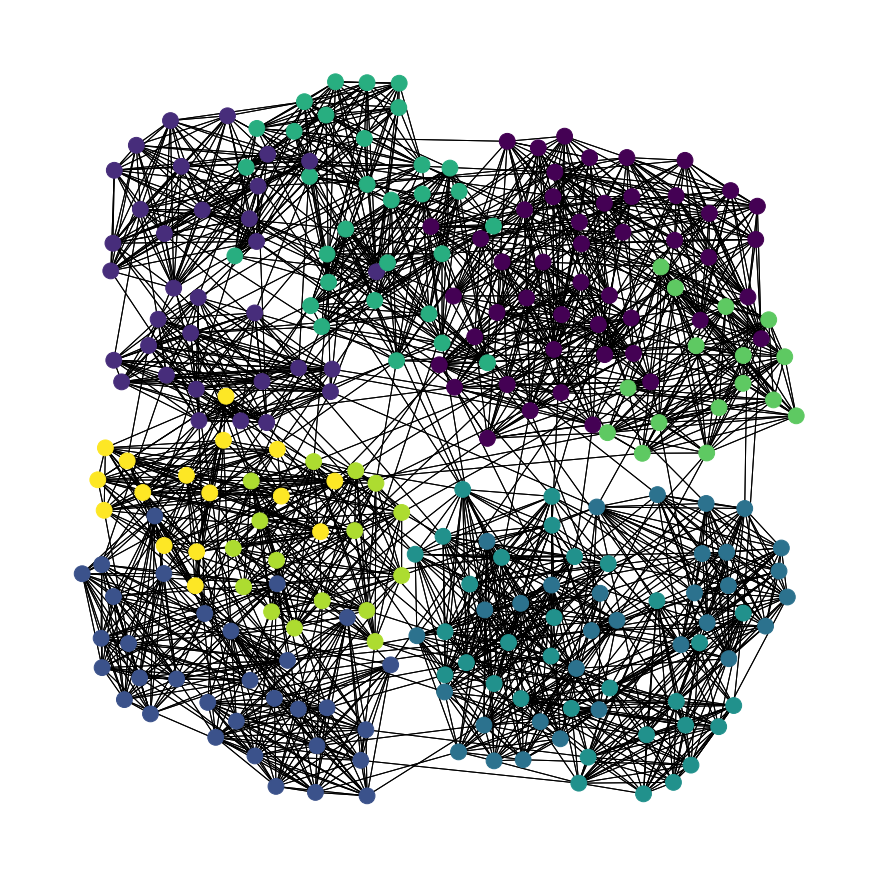

In [14]:
# get colormap to color nodes according to their partition
cmap = cm.get_cmap('viridis', max(part.values()) + 1)

nx.draw(G1, pos=pos, cmap=cmap, node_color=list(part.values()), node_size=250)

plt.savefig(os.path.join("images", network_f, network_name + '_greedy.png'))
plt.show()

### Write partitions in Pajek format (.clu)

In [15]:
from networkx.utils import open_file

@open_file(1, mode='wb')
def write_pajek_communities(communities, path, encoding = 'UTF-8'):
    
    first_line = f"*Vertices {G1.number_of_nodes()}"
    first_line += '\r\n'
    path.write(first_line.encode(encoding))
    
    for comm in part.values():
        line = f"{comm+1}"
        line += '\r\n'
        path.write(line.encode(encoding))        

In [16]:
path = os.path.join('partitions', network_f, network_name + '_greedy.clu')
write_pajek_communities(part, path)